### _Importing Required Libraries_

In [1]:
import pandas as pd
import math

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### _Reading Train & Test Files_

In [2]:
trainDataFrame = []

for trainDataIndex in range(1, 11):
    data = pd.read_csv(f'TrainingData/sample{trainDataIndex}.csv', names=['X', 'R'],  header=None)
    trainDataFrame.append(data)

In [3]:
testDataFrame = pd.read_csv('TestingData/test.csv', names=['X', 'R'], header=None)

### _Seperate Input - X & Output - R_

In [4]:
train_x = []
train_r = []

for index in range(10):
    train_x.append(trainDataFrame[index]['X'].values)
    train_r.append(trainDataFrame[index]['R'].values)

In [5]:
test_x = testDataFrame['X'].values
test_r = testDataFrame['R'].values

### _Ploting the Whole Training & Testing Data_

In [6]:
def plotingData(data_x, data_r, title, color):
    plt.title(title, fontweight="bold", style="italic")
    plt.xlabel("Input - X", fontweight="bold", style="italic")
    plt.ylabel("Output - R", fontweight="bold", style="italic")
    plt.scatter(data_x, data_r, color=color)
    plt.show()

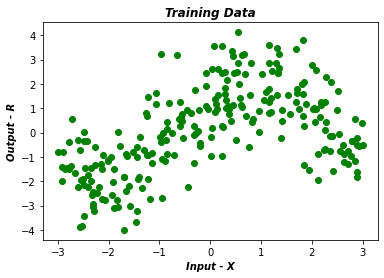

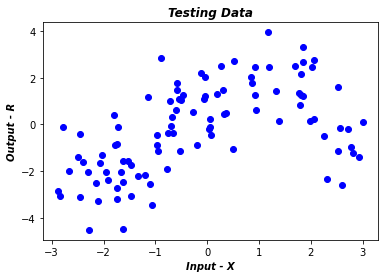

In [7]:
plotingData(train_x, train_r, 'Training Data', 'g')
plotingData(test_x, test_r, 'Testing Data', 'b')

### _Gaussian Kernel & Kernel Smoother Function_

In [8]:
def gaussian_kernel(u):
    return 1/math.sqrt(2*math.pi) * math.exp(-(u**2)/2)

In [9]:
def kernel_smoother(test_x, train_x, train_r, h):
    kernelSmootherResult = []
    for tx in test_x:
        numerator = 0
        denominator = 0
        for index in range(len(train_x)):
            numerator += gaussian_kernel((tx-train_x[index])/h)*train_r[index]
            denominator += gaussian_kernel((tx-train_x[index])/h)
        kernelSmootherResult.append(numerator/denominator)
    return kernelSmootherResult

### _Kernel Smoothing of h value 0.05_

In [10]:
kernelSmoother_005 = []

for index in range(10):
    result = kernel_smoother(test_x, train_x[index], train_r[index], 0.05)
    kernelSmoother_005.append(result)

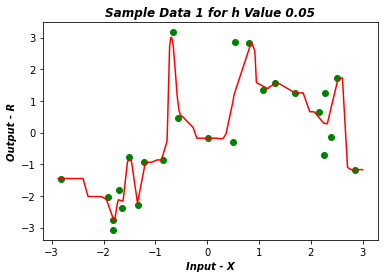

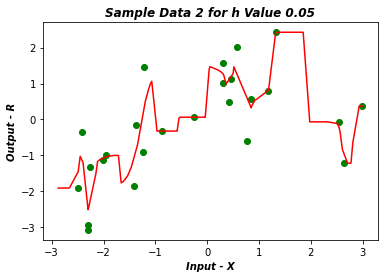

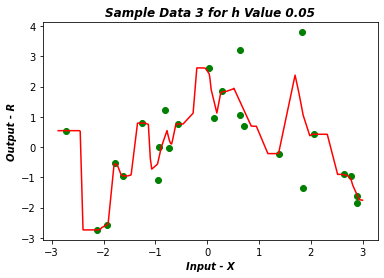

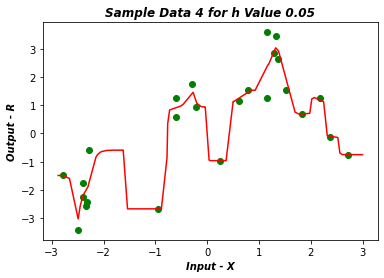

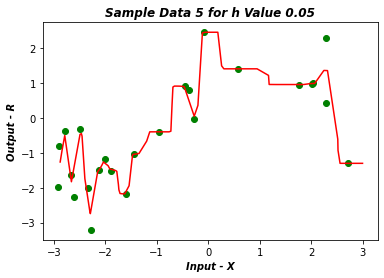

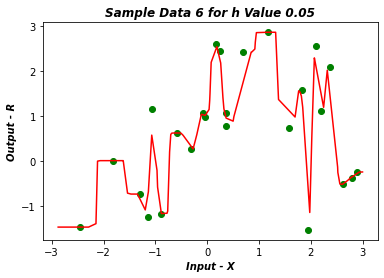

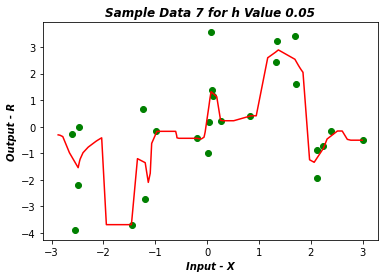

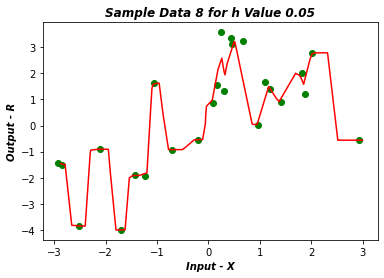

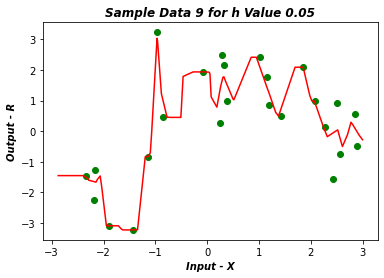

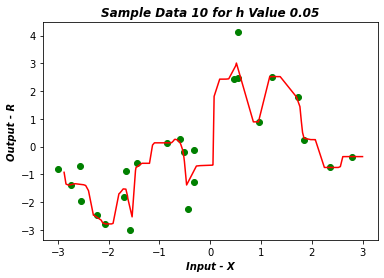

In [11]:
for index in range(10):
    plt.title(f'Sample Data {index+1} for h Value 0.05', fontweight="bold", style="italic")
    plt.xlabel("Input - X", fontweight="bold", style="italic")
    plt.ylabel("Output - R", fontweight="bold", style="italic")
    plt.scatter(train_x[index], train_r[index], color = 'g')
    plt.plot(test_x, kernelSmoother_005[index], color = 'r')
    plt.show()

### _Calculating Mean Squared Error for Each Sample_

In [12]:
MeanSquaredError005 = []

for index in range(10):
    mse = mean_squared_error(test_r, kernelSmoother_005[index])
    MeanSquaredError005.append(mse)

In [13]:
for index, mse in enumerate(MeanSquaredError005):
    print(f'MSE for Sample {index+1} & h value 0.05: {mse}')

MSE for Sample 1 & h value 0.05: 2.239243757110487
MSE for Sample 2 & h value 0.05: 2.1496154655878574
MSE for Sample 3 & h value 0.05: 2.735620020103718
MSE for Sample 4 & h value 0.05: 2.4056606522357047
MSE for Sample 5 & h value 0.05: 1.9678604870381204
MSE for Sample 6 & h value 0.05: 2.5512667342926725
MSE for Sample 7 & h value 0.05: 2.87554128617407
MSE for Sample 8 & h value 0.05: 3.615801106970661
MSE for Sample 9 & h value 0.05: 2.317248136919054
MSE for Sample 10 & h value 0.05: 2.2296223365721555


### _Calculating Avarage Mean Squared Error for h value 0.05_

In [14]:
total = 0
length = len(MeanSquaredError005)

for index in range(10):
    total += MeanSquaredError005[index]

averageMSE_005 = total/length
print('Avarage MSE for h value 0.05:', averageMSE_005)

Avarage MSE for h value 0.05: 2.5087479983004504


### _Kernel Smoothing of h value 0.1_

In [15]:
kernelSmoother_01 = []

for index in range(10):
    result = kernel_smoother(test_x, train_x[index], train_r[index], 0.1)
    kernelSmoother_01.append(result)

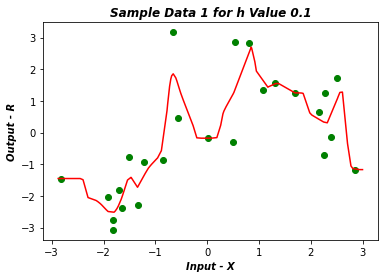

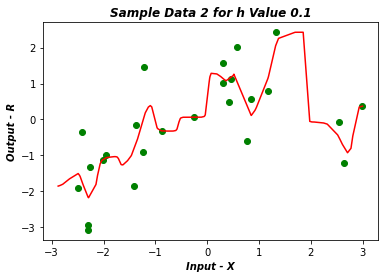

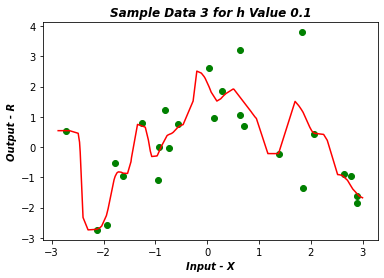

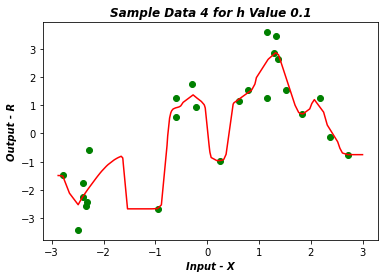

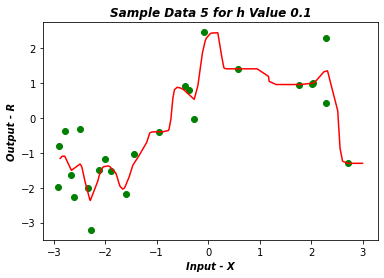

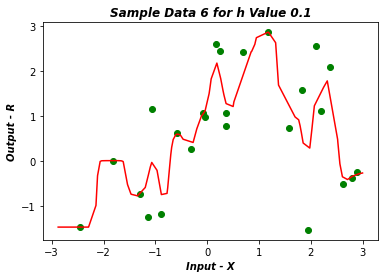

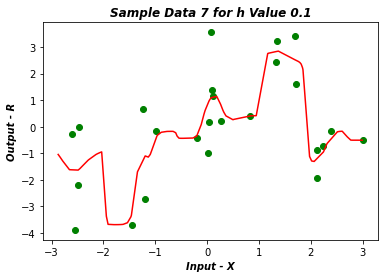

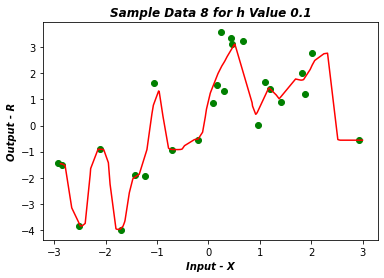

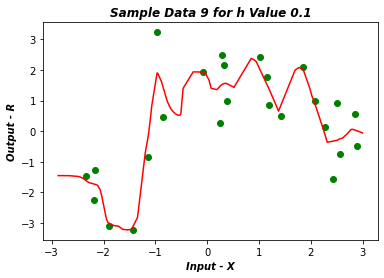

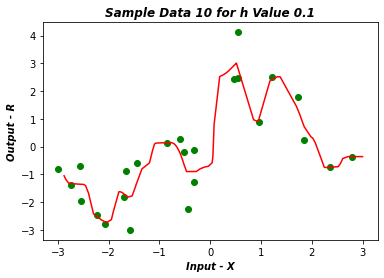

In [16]:
for index in range(10):
    plt.title(f'Sample Data {index+1} for h Value 0.1', fontweight="bold", style="italic")
    plt.xlabel("Input - X", fontweight="bold", style="italic")
    plt.ylabel("Output - R", fontweight="bold", style="italic")
    plt.scatter(train_x[index], train_r[index], color = 'g')
    plt.plot(test_x, kernelSmoother_01[index], color = 'r')
    plt.show()

### _Calculating Mean Squared Error for Each Sample_

In [17]:
MeanSquaredError01 = []

for index in range(10):
    mse = mean_squared_error(test_r, kernelSmoother_01[index])
    MeanSquaredError01.append(mse)

In [18]:
for index, mse in enumerate(MeanSquaredError01):
    print(f'MSE for Sample {index+1} & h value 0.1: {mse}')

MSE for Sample 1 & h value 0.1: 1.9463208489861115
MSE for Sample 2 & h value 0.1: 2.0562267158582044
MSE for Sample 3 & h value 0.1: 2.6346877202598176
MSE for Sample 4 & h value 0.1: 2.1838292463168014
MSE for Sample 5 & h value 0.1: 1.86686625068704
MSE for Sample 6 & h value 0.1: 2.5292208609555527
MSE for Sample 7 & h value 0.1: 2.4737205784875913
MSE for Sample 8 & h value 0.1: 3.2614362735140685
MSE for Sample 9 & h value 0.1: 2.161173227762924
MSE for Sample 10 & h value 0.1: 2.143475159368925


### _Calculating Avarage Mean Squared Error for h value 0.1_

In [19]:
total = 0
length = len(MeanSquaredError01)

for index in range(10):
    total += MeanSquaredError01[index]

averageMSE_01 = total/length
print('Avarage MSE for h value 0.1:', averageMSE_01)

Avarage MSE for h value 0.1: 2.325695688219704


### _Kernel Smoothing of h value 0.25_

In [20]:
kernelSmoother_025 = []

for index in range(10):
    result = kernel_smoother(test_x, train_x[index], train_r[index], 0.25)
    kernelSmoother_025.append(result)

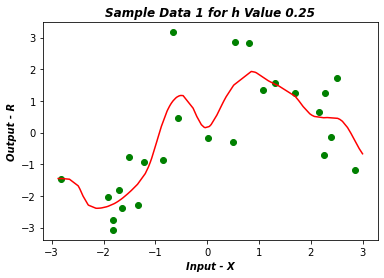

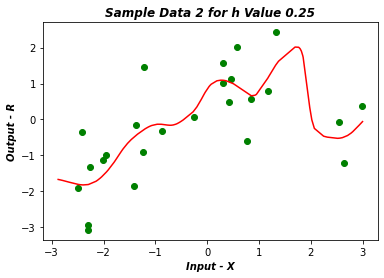

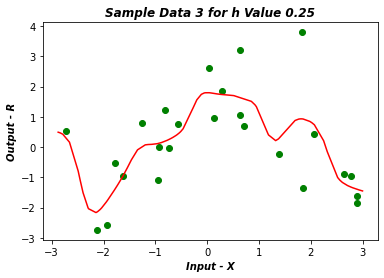

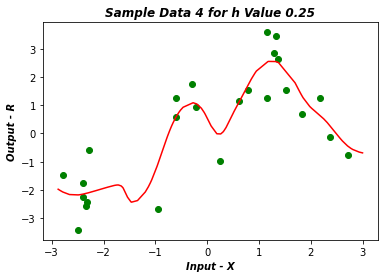

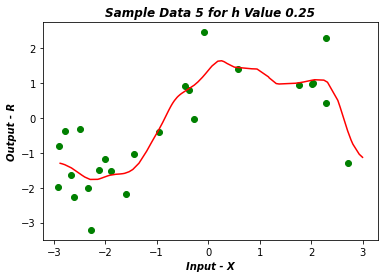

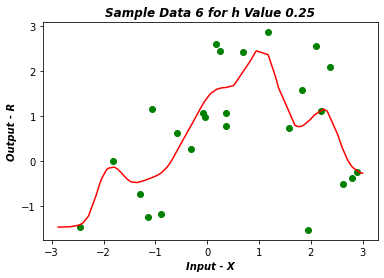

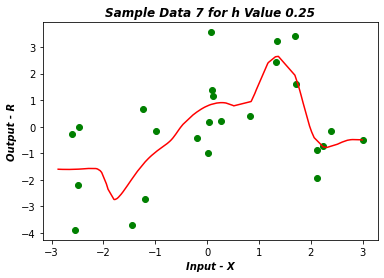

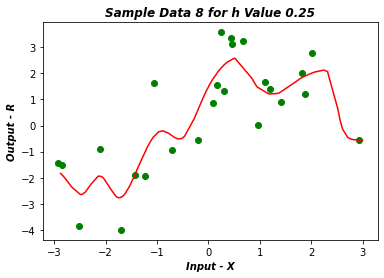

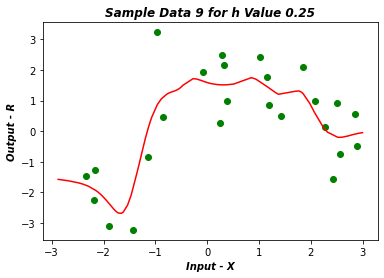

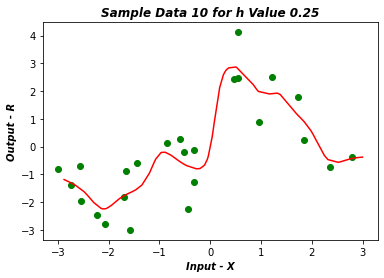

In [21]:
for index in range(10):
    plt.title(f'Sample Data {index+1} for h Value 0.25', fontweight="bold", style="italic")
    plt.xlabel("Input - X", fontweight="bold", style="italic")
    plt.ylabel("Output - R", fontweight="bold", style="italic")
    plt.scatter(train_x[index], train_r[index], color = 'g')
    plt.plot(test_x, kernelSmoother_025[index], color = 'r')
    plt.show()

### _Calculating Mean Squared Error for Each Sample_

In [22]:
MeanSquaredError025 = []

for index in range(10):
    mse = mean_squared_error(test_r, kernelSmoother_025[index])
    MeanSquaredError025.append(mse)

In [23]:
for index, mse in enumerate(MeanSquaredError025):
    print(f'MSE for Sample {index+1} & h value 0.25: {mse}')

MSE for Sample 1 & h value 0.25: 1.6656802451920276
MSE for Sample 2 & h value 0.25: 1.8825524216281033
MSE for Sample 3 & h value 0.25: 2.272151289530907
MSE for Sample 4 & h value 0.25: 1.5111307247340966
MSE for Sample 5 & h value 0.25: 1.7036898095935766
MSE for Sample 6 & h value 0.25: 2.3383562594900216
MSE for Sample 7 & h value 0.25: 1.7579485051783987
MSE for Sample 8 & h value 0.25: 2.0855804381170584
MSE for Sample 9 & h value 0.25: 1.9446654884319612
MSE for Sample 10 & h value 0.25: 1.9991650767538318


### _Calculating Avarage Mean Squared Error for h value 0.25_

In [24]:
total = 0
length = len(MeanSquaredError025)

for index in range(10):
    total += MeanSquaredError025[index]

averageMSE_025 = total/length
print('Avarage MSE for h value 0.25:', averageMSE_025)

Avarage MSE for h value 0.25: 1.9160920258649985


### _Kernel Smoothing of h value 0.5_

In [25]:
kernelSmoother_05 = []

for index in range(10):
    result = kernel_smoother(test_x, train_x[index], train_r[index], 0.5)
    kernelSmoother_05.append(result)

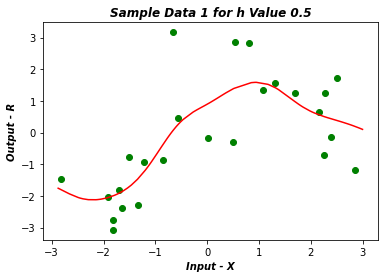

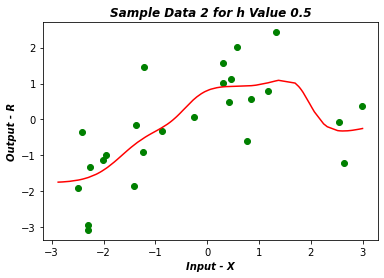

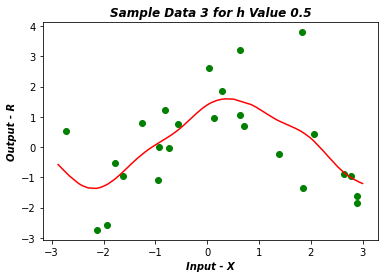

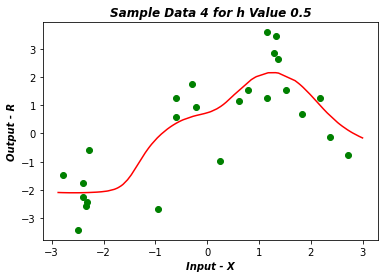

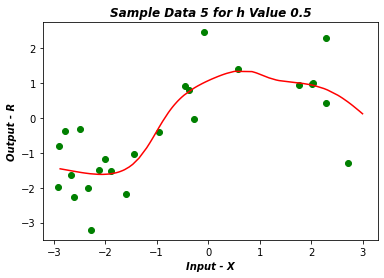

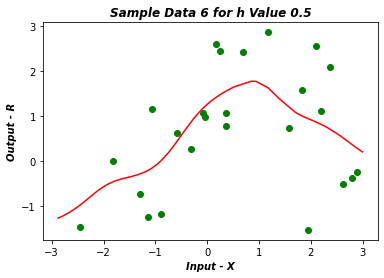

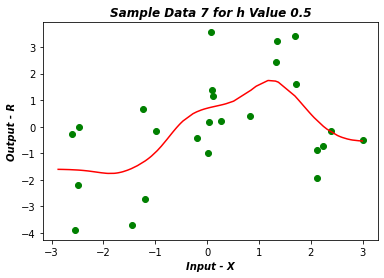

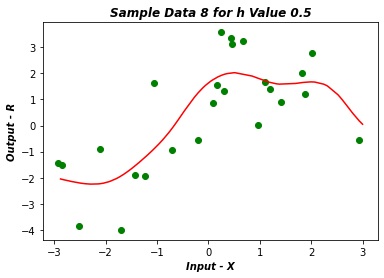

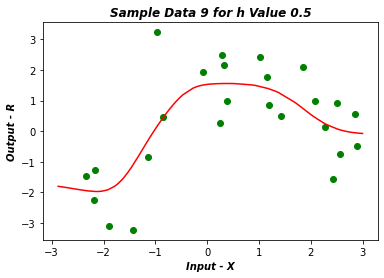

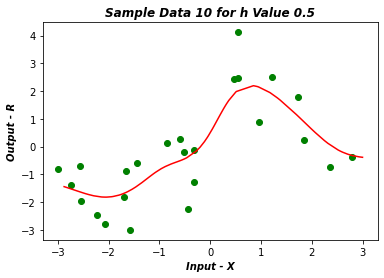

In [26]:
for index in range(10):
    plt.title(f'Sample Data {index+1} for h Value 0.5', fontweight="bold", style="italic")
    plt.xlabel("Input - X", fontweight="bold", style="italic")
    plt.ylabel("Output - R", fontweight="bold", style="italic")
    plt.scatter(train_x[index], train_r[index], color = 'g')
    plt.plot(test_x, kernelSmoother_05[index], color = 'r')
    plt.show()

### _Calculating Mean Squared Error for Each Sample_

In [27]:
MeanSquaredError05 = []

for index in range(10):
    mse = mean_squared_error(test_r, kernelSmoother_05[index])
    MeanSquaredError05.append(mse)

In [28]:
for index, mse in enumerate(MeanSquaredError05):
    print(f'MSE for Sample {index+1} & h value 0.5: {mse}')

MSE for Sample 1 & h value 0.5: 1.639330672456036
MSE for Sample 2 & h value 0.5: 1.836829889337494
MSE for Sample 3 & h value 0.5: 2.1095992986169483
MSE for Sample 4 & h value 0.5: 1.5724149497667372
MSE for Sample 5 & h value 0.5: 1.7723281221820535
MSE for Sample 6 & h value 0.5: 2.323273279531599
MSE for Sample 7 & h value 0.5: 1.586051956345641
MSE for Sample 8 & h value 0.5: 1.8661414309609226
MSE for Sample 9 & h value 0.5: 1.8172029390986768
MSE for Sample 10 & h value 0.5: 1.7397594413580786


### _Calculating Avarage Mean Squared Error for h value 0.5_

In [29]:
total = 0
length = len(MeanSquaredError05)

for index in range(10):
    total += MeanSquaredError05[index]

averageMSE_05 = total/length
print('Avarage MSE for h value 0.5:', averageMSE_05)

Avarage MSE for h value 0.5: 1.8262931979654187


### _Kernel Smoothing of h value 1_

In [30]:
kernelSmoother_1 = []

for index in range(10):
    result = kernel_smoother(test_x, train_x[index], train_r[index], 1)
    kernelSmoother_1.append(result)

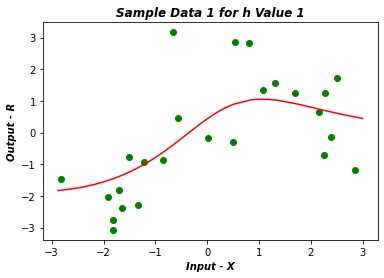

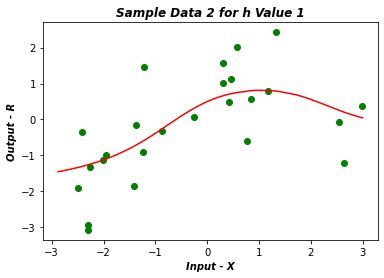

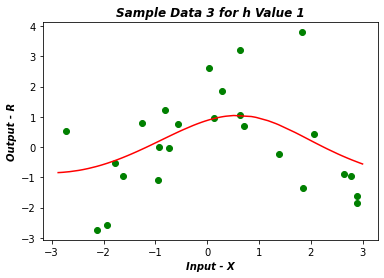

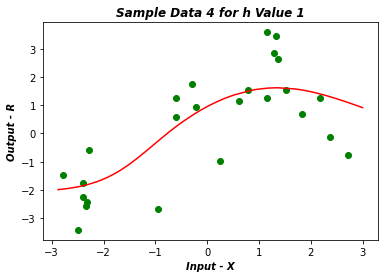

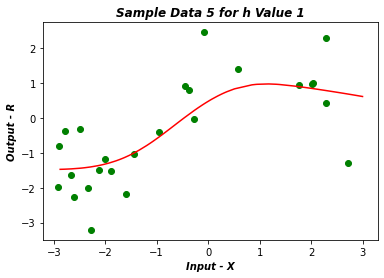

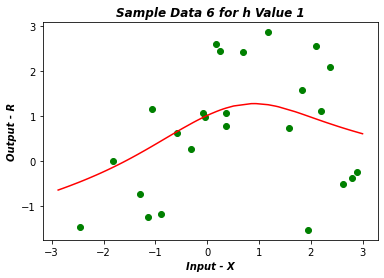

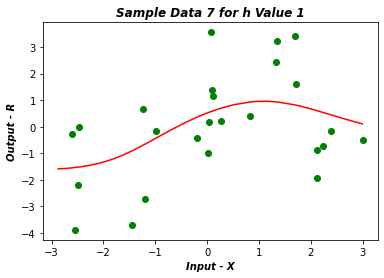

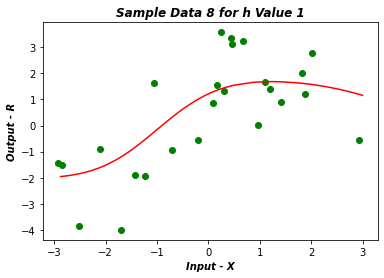

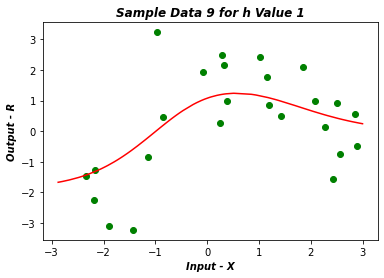

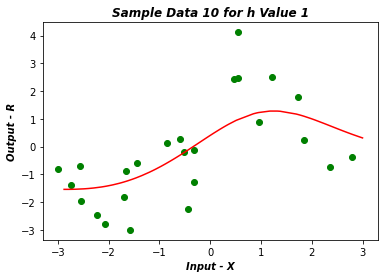

In [31]:
for index in range(10):
    plt.title(f'Sample Data {index+1} for h Value 1', fontweight="bold", style="italic")
    plt.xlabel("Input - X", fontweight="bold", style="italic")
    plt.ylabel("Output - R", fontweight="bold", style="italic")
    plt.scatter(train_x[index], train_r[index], color = 'g')
    plt.plot(test_x, kernelSmoother_1[index], color = 'r')
    plt.show()

### _Calculating Mean Squared Error for Each Sample_

In [32]:
MeanSquaredError1 = []

for index in range(10):
    mse = mean_squared_error(test_r, kernelSmoother_1[index])
    MeanSquaredError1.append(mse)

In [33]:
for index, mse in enumerate(MeanSquaredError1):
    print(f'MSE for Sample {index+1} & h value 1: {mse}')

MSE for Sample 1 & h value 1: 1.9032892254637963
MSE for Sample 2 & h value 1: 2.0573668105579164
MSE for Sample 3 & h value 1: 2.4803815882053275
MSE for Sample 4 & h value 1: 1.9328095470027522
MSE for Sample 5 & h value 1: 2.013073060115863
MSE for Sample 6 & h value 1: 2.8547680351610736
MSE for Sample 7 & h value 1: 1.9325335171248066
MSE for Sample 8 & h value 1: 2.0903311735280177
MSE for Sample 9 & h value 1: 2.0258605487526973
MSE for Sample 10 & h value 1: 1.8888946670616116


### _Calculating Avarage Mean Squared Error for h value 1_

In [34]:
total = 0
length = len(MeanSquaredError1)

for index in range(10):
    total += MeanSquaredError1[index]

averageMSE_1 = total/length
print('Avarage MSE for h value 1:', averageMSE_1)

Avarage MSE for h value 1: 2.1179308172973856


### _Kernel Smoothing of h value 5_

In [35]:
kernelSmoother_5 = []

for index in range(10):
    result = kernel_smoother(test_x, train_x[index], train_r[index], 5)
    kernelSmoother_5.append(result)

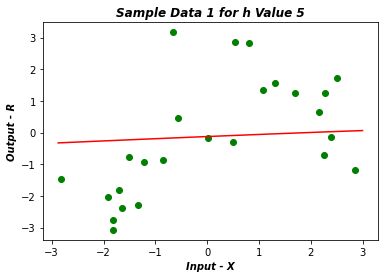

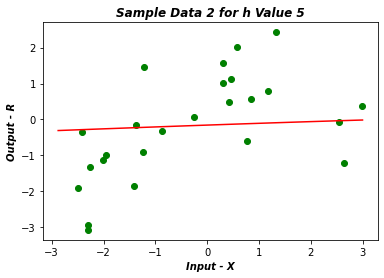

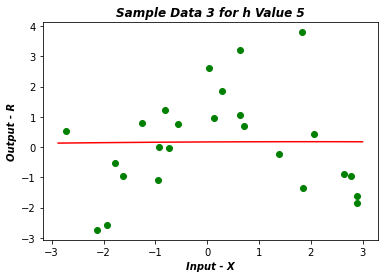

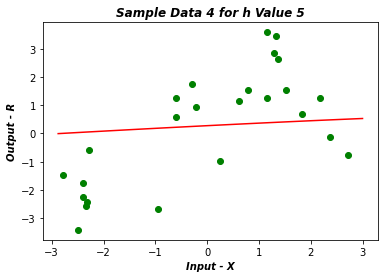

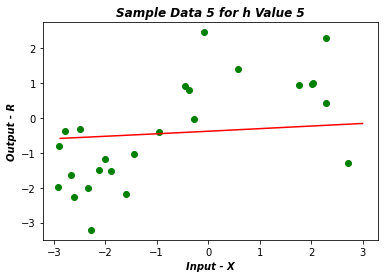

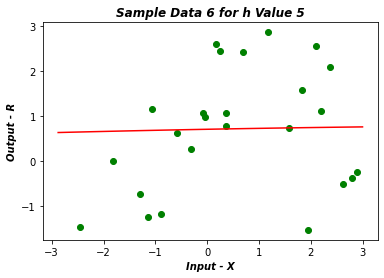

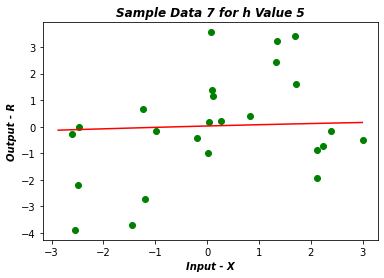

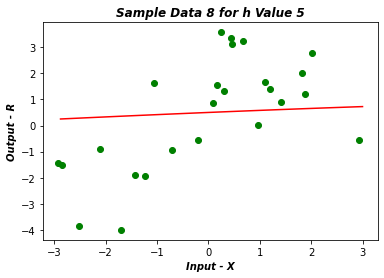

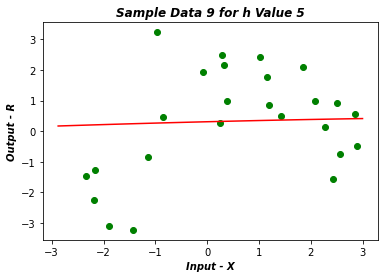

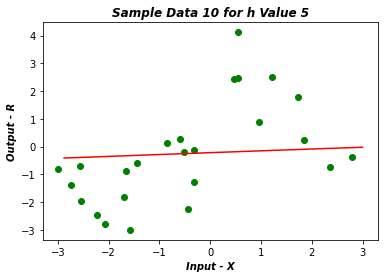

In [36]:
for index in range(10):
    plt.title(f'Sample Data {index+1} for h Value 5', fontweight="bold", style="italic")
    plt.xlabel("Input - X", fontweight="bold", style="italic")
    plt.ylabel("Output - R", fontweight="bold", style="italic")
    plt.scatter(train_x[index], train_r[index], color = 'g')
    plt.plot(test_x, kernelSmoother_5[index], color = 'r')
    plt.show()

### _Calculating Mean Squared Error for Each Sample_

In [37]:
MeanSquaredError5 = []

for index in range(10):
    mse = mean_squared_error(test_r, kernelSmoother_5[index])
    MeanSquaredError5.append(mse)

In [38]:
for index, mse in enumerate(MeanSquaredError5):
    print(f'MSE for Sample {index+1} & h value 5: {mse}')

MSE for Sample 1 & h value 5: 3.3066496638999805
MSE for Sample 2 & h value 5: 3.3517416866112506
MSE for Sample 3 & h value 5: 3.6145320067427336
MSE for Sample 4 & h value 5: 3.442878837049337
MSE for Sample 5 & h value 5: 3.3222877048539976
MSE for Sample 6 & h value 5: 4.263009270945942
MSE for Sample 7 & h value 5: 3.39901752591922
MSE for Sample 8 & h value 5: 3.7334706524982386
MSE for Sample 9 & h value 5: 3.622125095537891
MSE for Sample 10 & h value 5: 3.3056548582758905


### _Calculating Avarage Mean Squared Error for h value 5_

In [39]:
total = 0
length = len(MeanSquaredError5)

for index in range(10):
    total += MeanSquaredError5[index]

averageMSE_5 = total/length
print('Avarage MSE for h value 5:', averageMSE_5)

Avarage MSE for h value 5: 3.5361367302334488


### _Plotting Average Mean Squared Error for Each h Value_

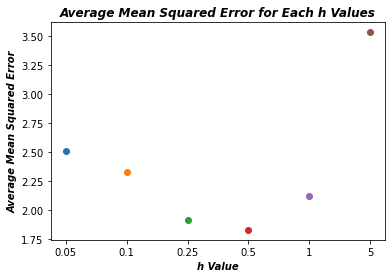

In [40]:
averageMSE = [averageMSE_005, averageMSE_01, averageMSE_025, averageMSE_05, averageMSE_1, averageMSE_5]
labels = ['0.05', '0.1', '0.25', '0.5', '1', '5']

for index in range(6):
    plt.title('Average Mean Squared Error for Each h Values', fontweight="bold", style="italic")
    plt.xlabel("h Value", fontweight="bold", style="italic")
    plt.ylabel("Average Mean Squared Error", fontweight="bold", style="italic")
    plt.scatter(f'{labels[index]}', averageMSE[index])